In [1]:
%cd /content/drive/MyDrive/DL/BI

/content/drive/MyDrive/DL/BI


In [122]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from time import time
from sklearn.metrics import roc_auc_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

In [3]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_csv('transcript.csv')
transcript.drop('id',axis=1,inplace=True)

In [4]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
transcript

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
...,...,...,...,...
199996,transaction,be983f80dcbd4bafa18794dbd103553b,492,{'amount': 2.34}
199997,transaction,1f6ad0a8def240b3ad633f83032dedd8,492,{'amount': 3.26}
199998,transaction,f093e47717a7481786d016b1fe56d1ad,492,{'amount': 1.18}
199999,transaction,ae1a36f874a34dd6acaf8e286814a715,492,{'amount': 4.91}


In [7]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [8]:
profile['gender'].isnull().sum()

2175

In [9]:
profile[(profile['gender'].isnull())]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [10]:
profile['gender'].iloc[profile['gender'].isnull()] = 'U'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
profile['gender'].value_counts()

M    8484
F    6129
U    2175
O     212
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution')

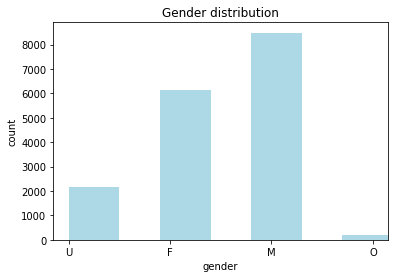

In [12]:
plt.hist(profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

Group 1: customers effected by promotion

Behaviors 1: Offer received - offer viewed - transaction - offer completed
Behaviors 2: Offer received - offer viewed - transaction (In case of informational offer will not have offer completed)
Group 2: customers no effected by promotions

Behaviors 1: Offer received
Behaviors 2: Offer received - offer viewed
Group 3: loyal customers (buy Starbucks anyway)

Behaviors 1: transaction - offer received
Behaviors 2: transaction - offer received - offer viewed
Behaviors 3: offer received - transaction
Behaviors 4: offer received - transaction - offer viewed

In [13]:
transcript['offer_id'] = None
# Create one table with only offer receive and offer viewed and another table with offer completed. Because offer completed
# rows have different format then another offers, and there are also reward involved the offer completed
transcript_offer1 = transcript[transcript.event.isin(['offer received', 'offer viewed'])]
transcript_offer2 = transcript[transcript.event == 'offer completed']

transcript_transaction = transcript[transcript.event == 'transaction']

In [14]:
transcript_offer1.loc[:, 'offer_id'] = transcript_offer1.loc[:, 'value'].apply(lambda x: eval(x)['offer id'])
transcript_offer1.loc[:, 'value'] = 0
transcript_offer2.loc[:, 'offer_id'] = transcript_offer2.loc[:, 'value'].apply(lambda x: eval(x)['offer_id'])
transcript_offer2.loc[:, 'value'] = 0
transcript_transaction.loc[:, 'value'] = transcript_transaction.loc[:, 'value'].apply(lambda x: eval(x)['amount'])

transcript = pd.concat([transcript_offer1, transcript_offer2, transcript_transaction])
transcript.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
transcript['days'] = transcript['time']/24
transcript = transcript.drop(columns = 'time', axis = 1)

In [16]:
profile = profile.rename(columns={'id':'person'})
transcript = transcript.merge(profile, on = 'person', how = 'left')

In [17]:
transcript

,event,person,value,offer_id,days,gender,age,became_member_on,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,F,75,20170509,100000.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,U,118,20170804,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.00,2906b810c7d4411798c6938adc9daaa5,0.0,M,68,20180426,70000.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.00,fafdcd668e3743c1bb461111dcafc2a4,0.0,U,118,20170925,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,U,118,20171002,NaN
...,...,...,...,...,...,...,...,...,...
199996,transaction,be983f80dcbd4bafa18794dbd103553b,2.34,None,20.5,U,118,20170125,NaN
199997,transaction,1f6ad0a8def240b3ad633f83032dedd8,3.26,None,20.5,M,69,20130801,73000.0
199998,transaction,f093e47717a7481786d016b1fe56d1ad,1.18,None,20.5,F,70,20170802,71000.0
199999,transaction,ae1a36f874a34dd6acaf8e286814a715,4.91,None,20.5,F,28,20171213,39000.0


In [18]:
transcript.groupby('person')['event'].value_counts().head(10)

person                            event          
0009655768c64bdeb2e877511632db8f  offer received     3
                                  offer viewed       3
                                  transaction        2
                                  offer completed    1
00116118485d4dfda04fdbaba9a87b5c  transaction        3
                                  offer received     1
                                  offer viewed       1
0011e0d4e6b944f998e987f904e8c1e5  offer received     4
                                  offer viewed       4
                                  transaction        2
Name: event, dtype: int64

In [19]:
transcript = pd.concat([transcript,pd.get_dummies(transcript['event'])],axis=1)
transcript.head()

,event,person,value,offer_id,days,gender,age,became_member_on,income,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,F,75,20170509,100000.0,0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,U,118,20170804,NaN,0,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,0.0,M,68,20180426,70000.0,0,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,fafdcd668e3743c1bb461111dcafc2a4,0.0,U,118,20170925,NaN,0,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,U,118,20171002,NaN,0,1,0,0


In [20]:
channels = []
for channel in portfolio.channels:
    for t in channel:
        if t not in channels:
            channels.append(t)
# we end up needing this later
channels

['email', 'mobile', 'social', 'web']

In [21]:
for channel in channels:
    portfolio[channel] = portfolio['channels'].apply(lambda x: 1 if channel in x else 0) 
    
portfolio = portfolio.drop('channels', axis = 1)

In [22]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [23]:
transcript_total = pd.merge(transcript, portfolio, how = 'left', left_on = 'offer_id', right_on = 'id')
transcript_total = transcript_total.sort_values(by=['person', 'days'])
transcript_total['offer_id'] = transcript_total['offer_id'].fillna(method ='ffill').where(
    (transcript_total['event'].shift() == 'offer viewed')|(transcript_total['event'].shift() == 'offer completed'), 
    transcript_total['offer_id'])

In [24]:
transcript_total

,event,person,value,offer_id,days,gender,age,became_member_on,income,offer completed,...,transaction,reward,difficulty,duration,offer_type,id,email,mobile,social,web
55972,offer received,0009655768c64bdeb2e877511632db8f,0.00,5a8bc65990b245e5a138643cd4eb9837,7.00,M,33,20170421,72000.0,0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
77705,offer viewed,0009655768c64bdeb2e877511632db8f,0.00,5a8bc65990b245e5a138643cd4eb9837,8.00,M,33,20170421,72000.0,0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
89291,transaction,0009655768c64bdeb2e877511632db8f,22.16,5a8bc65990b245e5a138643cd4eb9837,9.50,M,33,20170421,72000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113605,offer received,0009655768c64bdeb2e877511632db8f,0.00,3f207df678b143eea3cee63160fa8bed,14.00,M,33,20170421,72000.0,0,...,0,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0
139992,offer viewed,0009655768c64bdeb2e877511632db8f,0.00,3f207df678b143eea3cee63160fa8bed,15.50,M,33,20170421,72000.0,0,...,0,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143788,offer completed,ffff82501cea40309d5fdd7edcca4a07,0.00,2906b810c7d4411798c6938adc9daaa5,16.00,F,45,20161125,62000.0,1,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
152030,offer received,ffff82501cea40309d5fdd7edcca4a07,0.00,2906b810c7d4411798c6938adc9daaa5,17.00,F,45,20161125,62000.0,0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
168022,offer viewed,ffff82501cea40309d5fdd7edcca4a07,0.00,2906b810c7d4411798c6938adc9daaa5,17.25,F,45,20161125,62000.0,0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
168023,transaction,ffff82501cea40309d5fdd7edcca4a07,17.55,2906b810c7d4411798c6938adc9daaa5,17.25,F,45,20161125,62000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
transcript_total.groupby('offer completed')['offer_type'].value_counts()

offer completed  offer_type   
0                bogo             37203
                 discount         34530
                 informational    17396
1                discount         10595
                 bogo              9658
Name: offer_type, dtype: int64

In [26]:
transcript_total[(transcript_total['person'] == '78afa995795e4d85b5d9ceeca43f5fef')]

,event,person,value,offer_id,days,gender,age,became_member_on,income,offer completed,...,transaction,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,F,75,20170509,100000.0,0,...,0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
15561,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.25,F,75,20170509,100000.0,0,...,0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,19.89,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.50,F,75,20170509,100000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47583,offer completed,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.50,F,75,20170509,100000.0,1,...,0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,17.78,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.00,F,75,20170509,100000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53176,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,5a8bc65990b245e5a138643cd4eb9837,7.00,F,75,20170509,100000.0,0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
85291,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.00,5a8bc65990b245e5a138643cd4eb9837,9.00,F,75,20170509,100000.0,0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,19.67,5a8bc65990b245e5a138643cd4eb9837,9.25,F,75,20170509,100000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,29.72,None,10.00,F,75,20170509,100000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,23.93,None,15.75,F,75,20170509,100000.0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Customer Effect

In [27]:
receive_completed = pd.merge(
    transcript_total.loc[transcript_total.event == "offer received", ["person", "offer_id", "days", "offer_type","duration"]],
    transcript_total.loc[transcript_total.event == "offer completed", ["person", "offer_id", "days", "reward"]],
    how="left", on=["person", "offer_id"])

receive_completed = receive_completed.rename(columns={'days_x':'receive_day', 'days_y':'complete_day'})

receive_completed

,person,offer_id,receive_day,offer_type,duration,complete_day,reward
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,informational,3.0,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,informational,4.0,NaN,NaN
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,bogo,5.0,17.25,5.0
3,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,7.0,bogo,5.0,NaN,NaN
4,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,informational,4.0,NaN,NaN
...,...,...,...,...,...,...,...
54311,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,7.0,discount,10.0,8.25,5.0
54312,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,7.0,16.00,2.0
54313,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,7.0,17.25,2.0
54314,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,16.00,2.0


In [28]:
receive_completed_trans = pd.merge(
    receive_completed,
    transcript_total.loc[transcript_total.event == "transaction", ["person", "offer_id", "days", "value"]],
    how="left", on=["person", "offer_id"])

receive_completed_trans =  receive_completed_trans.rename(columns={'days':'transaction_day'})

receive_completed_trans

,person,offer_id,receive_day,offer_type,duration,complete_day,reward,transaction_day,value
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,informational,3.0,NaN,NaN,9.50,22.16
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,informational,4.0,NaN,NaN,NaN,NaN
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,bogo,5.0,17.25,5.0,NaN,NaN
3,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,7.0,bogo,5.0,NaN,NaN,12.25,0.70
4,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,informational,4.0,NaN,NaN,5.50,13.49
...,...,...,...,...,...,...,...,...,...
76502,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,7.0,17.25,2.0,17.25,17.55
76503,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,16.00,2.0,16.00,15.57
76504,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,16.00,2.0,17.25,17.55
76505,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,17.25,2.0,16.00,15.57


In [29]:
def positive_users_promotion(df, offer_type):
    
    df = df[df['offer_type']== offer_type]
    
    df = df[df['value'].notnull()]
    
    df['reaction_time'] = df['transaction_day'] - df['receive_day']
    
    users_table = df[(df['reaction_time'] < df['duration'])].sort_values(by = 'value', ascending = False)
    
    return users_table

##Customers Affected Positively by Bogo

In [30]:
bogo_users = positive_users_promotion(receive_completed_trans, 'bogo')
bogo_users

,person,offer_id,receive_day,offer_type,duration,complete_day,reward,transaction_day,value,reaction_time
27737,5dfdad4241764dfe959f51b7460e42b1,f19421c1d4aa40978ebb69ca19b0e20d,17.0,bogo,5.0,18.5,5.0,4.50,936.94,-12.50
27734,5dfdad4241764dfe959f51b7460e42b1,f19421c1d4aa40978ebb69ca19b0e20d,17.0,bogo,5.0,4.5,5.0,4.50,936.94,-12.50
27726,5dfdad4241764dfe959f51b7460e42b1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,bogo,5.0,4.5,5.0,4.50,936.94,4.50
27729,5dfdad4241764dfe959f51b7460e42b1,f19421c1d4aa40978ebb69ca19b0e20d,0.0,bogo,5.0,18.5,5.0,4.50,936.94,4.50
1597,05bedc6bbcc64a41b1745f6efe00776d,f19421c1d4aa40978ebb69ca19b0e20d,14.0,bogo,5.0,15.5,5.0,15.50,919.16,1.50
...,...,...,...,...,...,...,...,...,...,...
38214,8210573590c443edac928eff65b93424,ae264e3637204a6fb9bb56bc8210ddfd,17.0,bogo,7.0,NaN,NaN,15.25,0.05,-1.75
11285,27eb22b701af40ac9ed610c10718fc1a,9b98b8c7a33c4b65b9aebfe6a799e6d9,14.0,bogo,7.0,NaN,NaN,9.75,0.05,-4.25
24238,51e96c98377740eba8cd99acf4962b11,ae264e3637204a6fb9bb56bc8210ddfd,0.0,bogo,7.0,NaN,NaN,4.75,0.05,4.75
11284,27eb22b701af40ac9ed610c10718fc1a,9b98b8c7a33c4b65b9aebfe6a799e6d9,7.0,bogo,7.0,NaN,NaN,9.75,0.05,2.75


In [31]:
bogo_users['person'].drop_duplicates().count()

9031

In [32]:
bogo_users.groupby('person')['offer_id'].apply(lambda x: x.drop_duplicates()).value_counts()

ae264e3637204a6fb9bb56bc8210ddfd    3108
4d5c57ea9a6940dd891ad53e9dbe8da0    3099
f19421c1d4aa40978ebb69ca19b0e20d    3040
9b98b8c7a33c4b65b9aebfe6a799e6d9    2040
Name: offer_id, dtype: int64

In [33]:
bogo1=bogo_users.groupby('offer_id')['person'].count()
bogo2=bogo_users.groupby('person')['offer_id'].apply(lambda x: x.drop_duplicates()).value_counts()
Frequency =bogo1/bogo2
Frequency

4d5c57ea9a6940dd891ad53e9dbe8da0    1.790900
9b98b8c7a33c4b65b9aebfe6a799e6d9    2.059804
ae264e3637204a6fb9bb56bc8210ddfd    1.955920
f19421c1d4aa40978ebb69ca19b0e20d    2.013158
dtype: float64

In [34]:
bogo_users_profile = pd.merge(
    bogo_users[["person","value"]],
    profile,
    how="inner", on=["person"])

bogo_users_profile.head()

,person,value,gender,age,became_member_on,income
0,5dfdad4241764dfe959f51b7460e42b1,936.94,F,47,20140620,97000.0
1,5dfdad4241764dfe959f51b7460e42b1,936.94,F,47,20140620,97000.0
2,5dfdad4241764dfe959f51b7460e42b1,936.94,F,47,20140620,97000.0
3,5dfdad4241764dfe959f51b7460e42b1,936.94,F,47,20140620,97000.0
4,5dfdad4241764dfe959f51b7460e42b1,30.05,F,47,20140620,97000.0


Text(0.5, 1.0, 'Age distribution')

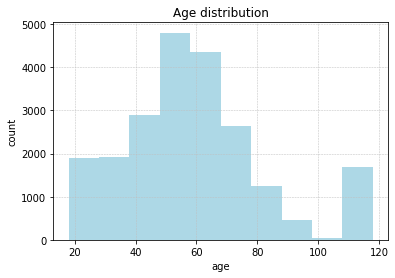

In [35]:
plt.hist(bogo_users_profile['age'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender distribution')

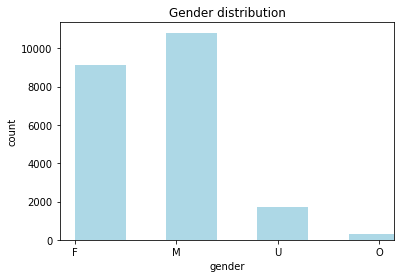

In [36]:
bogo_users_profile = bogo_users_profile[pd.notnull(bogo_users_profile['gender'])]
plt.hist(bogo_users_profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

In [37]:
bogo_users_profile.groupby('person')['gender'].apply(lambda x: x.drop_duplicates()).value_counts()

M    4550
F    3338
U    1034
O     109
Name: gender, dtype: int64

In [38]:
bogo_users.groupby('offer_id')['value'].sum()

offer_id
4d5c57ea9a6940dd891ad53e9dbe8da0     87302.60
9b98b8c7a33c4b65b9aebfe6a799e6d9     66095.74
ae264e3637204a6fb9bb56bc8210ddfd     97982.47
f19421c1d4aa40978ebb69ca19b0e20d    104280.02
Name: value, dtype: float64

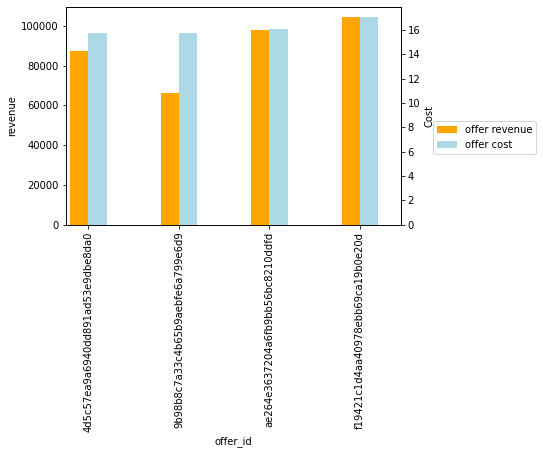

In [39]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
width = 0.2
bogo = bogo_users.groupby('offer_id')['value'].sum()
CPA_bogo = bogo_users.groupby('offer_id')['value'].sum()/bogo_users.groupby('offer_id')['person'].count()

bogo.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label = 'offer revenue')
CPA_bogo.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0, label = 'offer cost')

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2, label1+label2, loc='upper center', bbox_to_anchor=(1.25, 0.5))

ax1.set_ylabel('revenue')
ax2.set_ylabel('Cost')

plt.show()

###Bogo revenue generated

In [40]:
bogo_users_profile.groupby('person')['value'].count().sort_values(ascending = False).head(10)

person
4b72995c52ab4cd5ab407924b09e1ab4    80
948ec827ac334c8782a1da99a2d6a39b    80
db23badcb0e64c0eb193721a727a446f    54
c8f6b6d4decd48c1a81b6c8fcf567958    42
8b5ae6d6547745d5adae0b0828de3f7d    36
27aa749a6f5f448e91327028a2ac7fb5    36
e7757d0a16384143ad9b2f9e429c23a9    36
36ccfdf3474f472484327c266ef4fa84    33
aadef7df1ce5421e9b2daaf3c0086f90    33
073fce5708884b30a28b65b3cb15a919    33
Name: value, dtype: int64

In [41]:
bogo_users['value'].sum()

355660.83

#Customers Affected Positively by Discount

In [42]:
discount_users = positive_users_promotion(receive_completed_trans, 'discount')
discount_users.head()

,person,offer_id,receive_day,offer_type,duration,complete_day,reward,transaction_day,value,reaction_time
27969,5ecaea5c8bf44ae4a65838d9d066c909,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,10.0,0.25,2.0,4.25,1001.85,4.25
65750,dce784e26f294101999d000fad9089bb,fafdcd668e3743c1bb461111dcafc2a4,14.0,discount,10.0,1.75,2.0,15.50,989.34,1.50
65754,dce784e26f294101999d000fad9089bb,fafdcd668e3743c1bb461111dcafc2a4,14.0,discount,10.0,15.50,2.0,15.50,989.34,1.50
49700,a73cf044395d46ea804f688490ad9227,fafdcd668e3743c1bb461111dcafc2a4,0.0,discount,10.0,1.25,2.0,1.50,947.43,1.50
7920,1c05e4a68fc04d3da27454cb7eaa6144,fafdcd668e3743c1bb461111dcafc2a4,17.0,discount,10.0,16.00,2.0,20.25,901.37,3.25


In [43]:
discount_users_profile = pd.merge(
    discount_users[["person","value"]],
    profile,
    how="inner", on=["person"])

Text(0.5, 1.0, 'Age distribution')

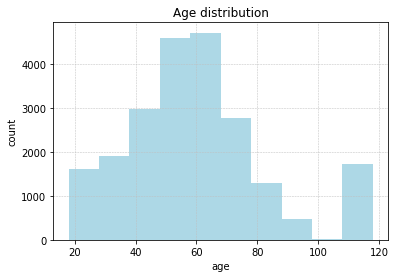

In [44]:
plt.hist(discount_users_profile['age'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender distribution')

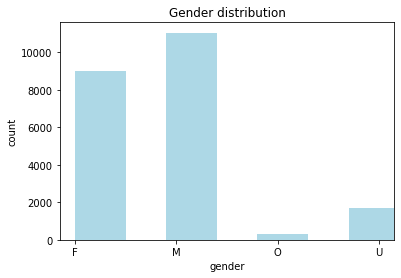

In [45]:
discount_users_profile = discount_users_profile[pd.notnull(discount_users_profile['gender'])]
plt.hist(discount_users_profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

The ratio of unknown gender to male or female decreases when compared with the total size of consensus

In [46]:
discount_users_profile.groupby('person')['gender'].apply(lambda x: x.drop_duplicates()).value_counts()

M    4131
F    3074
U     966
O     117
Name: gender, dtype: int64

###Gain From Discount

In [47]:
discount_users['value'].sum()

346993.11

In [48]:
discount_users.groupby('offer_id')['value'].sum()

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7     43117.32
2298d6c36e964ae4a3e7e9706d1fb8c2    106014.34
2906b810c7d4411798c6938adc9daaa5     70068.36
fafdcd668e3743c1bb461111dcafc2a4    127793.09
Name: value, dtype: float64

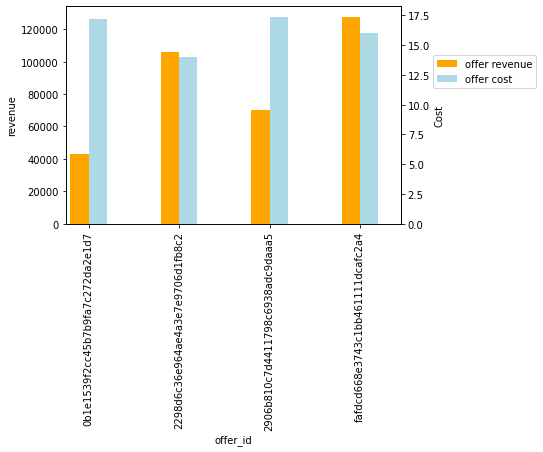

In [49]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
width = 0.2
disc = discount_users.groupby('offer_id')['value'].sum()
CPA_disc = discount_users.groupby('offer_id')['value'].sum()/discount_users.groupby('offer_id')['person'].count()

disc.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label = 'offer revenue')
CPA_disc.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0, label = 'offer cost')

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2, label1+label2, loc='upper center', bbox_to_anchor=(1.25, 0.8))

ax1.set_ylabel('revenue')
ax2.set_ylabel('Cost')

plt.show()

#Users affected positively by informational offer

In [50]:
informational_users = positive_users_promotion(receive_completed_trans, 'informational')
informational_users.head()

,person,offer_id,receive_day,offer_type,duration,complete_day,reward,transaction_day,value,reaction_time
66782,e0570660882b49db860b43f704e5590b,5a8bc65990b245e5a138643cd4eb9837,14.0,informational,3.0,NaN,NaN,14.50,725.99,0.50
15464,35055ff4289447df8c93739196163b01,3f207df678b143eea3cee63160fa8bed,14.0,informational,4.0,NaN,NaN,16.50,565.00,2.50
16723,38feae8a6b564476977e348198ed57b5,5a8bc65990b245e5a138643cd4eb9837,14.0,informational,3.0,NaN,NaN,14.00,552.43,0.00
76054,fe97aa22dd3e48c8b143116a8403dd52,5a8bc65990b245e5a138643cd4eb9837,17.0,informational,3.0,NaN,NaN,18.25,380.24,1.25
41686,8d5dc8f536bb487e9d5c72db1367b1d2,3f207df678b143eea3cee63160fa8bed,0.0,informational,4.0,NaN,NaN,2.50,355.41,2.50


In [51]:
informational_users.groupby('person')['offer_id'].apply(lambda x: x.drop_duplicates()).value_counts()

5a8bc65990b245e5a138643cd4eb9837    2210
3f207df678b143eea3cee63160fa8bed    1348
Name: offer_id, dtype: int64

In [52]:
informational_users_profile = pd.merge(
    informational_users[["person","value"]],
    profile,
    how="inner", on=["person"])

Text(0.5, 1.0, 'Age distribution')

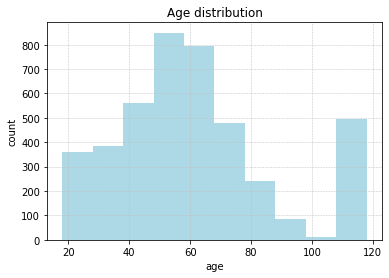

In [53]:
plt.hist(informational_users_profile['age'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender distribution')

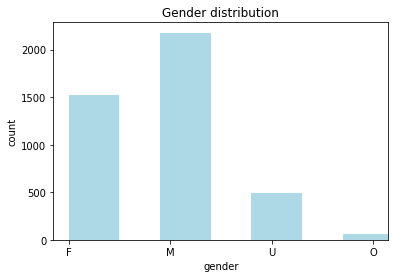

In [54]:
informational_users_profile = informational_users_profile[pd.notnull(informational_users_profile['gender'])]
plt.hist(informational_users_profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

In [55]:
informational_users_profile.groupby('person')['gender'].apply(lambda x: x.drop_duplicates()).value_counts()

M    1749
F    1217
U     402
O      47
Name: gender, dtype: int64

###Revenue Gained From Information Offer

In [56]:
informational_users['value'].sum()

54541.27

In [57]:
informational_users.groupby('offer_id')['value'].sum()

offer_id
3f207df678b143eea3cee63160fa8bed    22881.67
5a8bc65990b245e5a138643cd4eb9837    31659.60
Name: value, dtype: float64

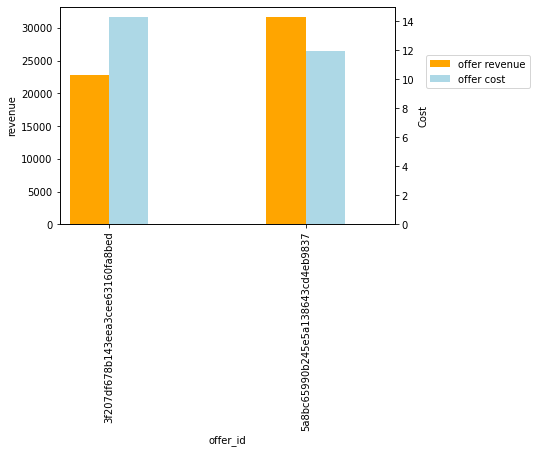

In [58]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
width = 0.2
informational = informational_users.groupby('offer_id')['value'].sum()
CPA_info = informational_users.groupby('offer_id')['value'].sum()/informational_users.groupby('offer_id')['person'].count()

informational.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label = 'offer revenue')
CPA_info.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0, label = 'offer cost')

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2, label1+label2, loc='upper center', bbox_to_anchor=(1.25, 0.8))

ax1.set_ylabel('revenue')
ax2.set_ylabel('Cost')

plt.show()

##Number of Offers

####One Type

In [59]:
offer1type = receive_completed_trans.loc[receive_completed_trans.groupby('person').offer_type.filter(
    lambda x: x.nunique()==1).index]

In [60]:
offer1type['value'].sum()

194256.28

In [61]:
offer1type.groupby('offer_type')['value'].sum()

offer_type
bogo             96211.32
discount         91739.56
informational     6305.40
Name: value, dtype: float64

####Two Types

In [62]:
offer2type = receive_completed_trans.loc[receive_completed_trans.groupby('person').offer_type.filter(
    lambda x: x.nunique()==2).index]

In [63]:
offer2type['value'].sum()

537560.94

In [64]:
offer2type.groupby('offer_type')['value'].sum()

offer_type
bogo             259190.11
discount         232945.62
informational     45425.21
Name: value, dtype: float64

####Three Types

In [65]:
offer3type = receive_completed_trans.loc[receive_completed_trans.groupby('person').offer_type.filter(
    lambda x: x.nunique()>2).index]

In [66]:
offer3type['value'].sum()

153876.43

In [67]:
offer3type.groupby('offer_type')['value'].sum()

offer_type
bogo             65993.41
discount         64053.16
informational    23829.86
Name: value, dtype: float64

In [68]:
comparison = pd.DataFrame({'offer type': ['1 type', '2 types', '3 types'], 
                                  'revenue':[offer1type['value'].sum(), offer2type['value'].sum(), offer3type['value'].sum()], 
                                  'users':[offer1type['person'].drop_duplicates().count(), 
                                           offer2type['person'].drop_duplicates().count(), 
                                           offer3type['person'].drop_duplicates().count()]})

comparison['revenue per user'] = comparison['revenue']/comparison['users']

In [69]:
comparison

,offer type,revenue,users,revenue per user
0,1 type,194256.28,3417,56.849950
1,2 types,537560.94,10039,53.547260
2,3 types,153876.43,3470,44.344793


#Compare Demographics

In [70]:
def plot_hist(variable,bins=None):
    plt.hist(discount_users_profile[variable],alpha=0.5, label='discount users',bins=bins)
    plt.hist(bogo_users_profile[variable], alpha=0.5, label='bogo users',bins=bins)
    plt.hist(informational_users_profile[variable], alpha=0.5, label='informational users',bins=bins)
    plt.legend(loc='upper right')
    plt.title('distribution of '+ variable + ' between different promotion users')
    plt.show()

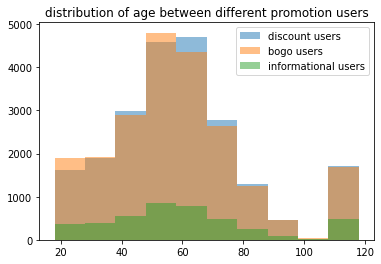

In [71]:
plot_hist('age')

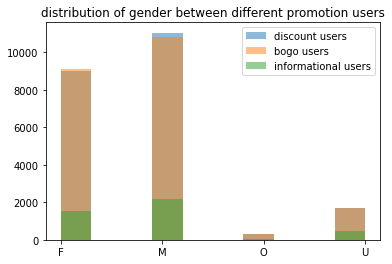

In [72]:
plot_hist('gender')

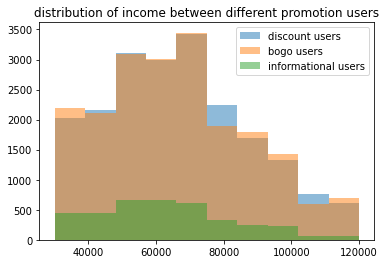

In [73]:
plot_hist('income')

#Customers not Interested in Promotions

In [74]:
transaction_users = set(transcript_total[(transcript_total['event'] == 'transaction')]['person'])
received_users = set(transcript_total[(transcript_total['event'] == 'offer received')]['person'])

users_no_transaction = received_users - transaction_users

In [75]:
len(users_no_transaction)

959

In [76]:
users_no_transaction_profile = transcript_total.loc[transcript_total['person'].isin(users_no_transaction)]

Text(0.5, 1.0, 'Age distribution')

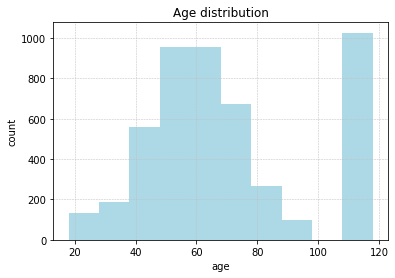

In [77]:
users_no_transaction_profile = users_no_transaction_profile[pd.notnull(users_no_transaction_profile['age'])]
plt.hist(users_no_transaction_profile['age'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender distribution')

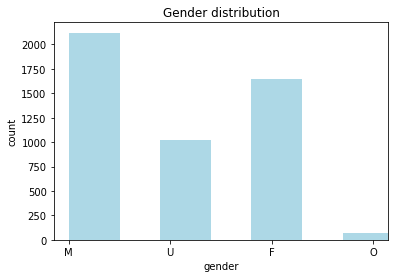

In [78]:
users_no_transaction_profile = users_no_transaction_profile[pd.notnull(users_no_transaction_profile['gender'])]
plt.hist(users_no_transaction_profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

In [79]:
users_no_transaction_profile.groupby('person')['gender'].apply(lambda x: x.drop_duplicates()).value_counts()

M    423
F    337
U    186
O     13
Name: gender, dtype: int64

Text(0.5, 1.0, 'Income distribution')

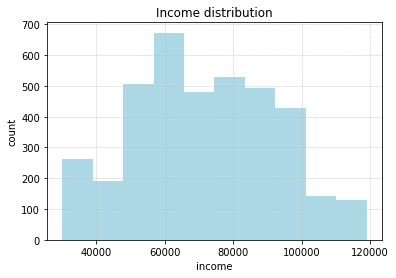

In [80]:
plt.hist(users_no_transaction_profile['income'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('income')
plt.ylabel('count')
plt.title('Income distribution')

#Customers who keep Buying

In [81]:
viewed_users = set(transcript_total[(transcript_total['event'] == 'offer viewed')]['person'])

In [82]:
len(viewed_users)

16274

In [83]:
loyal_customers = transaction_users - viewed_users
len(loyal_customers)

635

In [84]:
loyal_customer_profile = transcript_total.loc[transcript_total['person'].isin(loyal_customers)]

Text(0.5, 1.0, 'Age distribution')

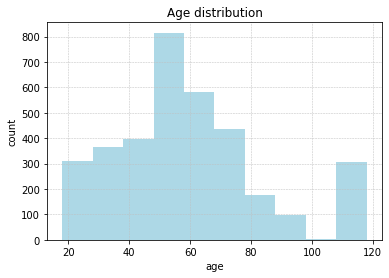

In [85]:
loyal_customer_profile = loyal_customer_profile[pd.notnull(loyal_customer_profile['age'])]
plt.hist(loyal_customer_profile ['age'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender distribution')

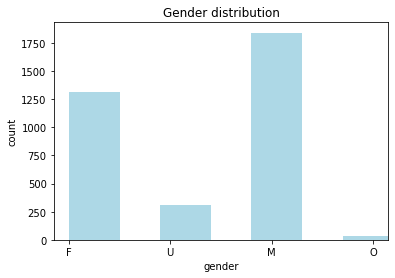

In [86]:
loyal_customer_profile = loyal_customer_profile[pd.notnull(loyal_customer_profile['gender'])]
plt.hist(loyal_customer_profile['gender'], color = 'lightblue', width=0.5)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender distribution')

In [87]:
loyal_customer_profile.groupby('person')['gender'].apply(lambda x: x.drop_duplicates()).value_counts()

M    330
F    238
U     62
O      5
Name: gender, dtype: int64

Text(0.5, 1.0, 'Income distribution')

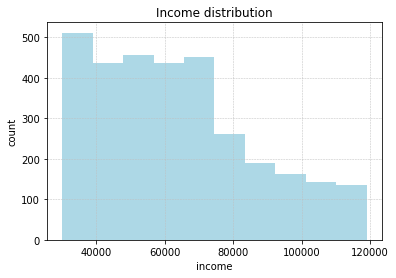

In [88]:
plt.hist(loyal_customer_profile['income'], color = 'lightblue')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')
plt.xlabel('income')
plt.ylabel('count')
plt.title('Income distribution')

#Creating Models

In [89]:
receive_completed_trans['effective_offer']=np.where((receive_completed_trans['duration']>
                                                     receive_completed_trans['transaction_day']-
                                                     receive_completed_trans['receive_day']),1,0)

receive_completed_trans

,person,offer_id,receive_day,offer_type,duration,complete_day,reward,transaction_day,value,effective_offer
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,informational,3.0,NaN,NaN,9.50,22.16,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,informational,4.0,NaN,NaN,NaN,NaN,0
2,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,bogo,5.0,17.25,5.0,NaN,NaN,0
3,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,7.0,bogo,5.0,NaN,NaN,12.25,0.70,0
4,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,informational,4.0,NaN,NaN,5.50,13.49,0
...,...,...,...,...,...,...,...,...,...,...
76502,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,14.0,discount,7.0,17.25,2.0,17.25,17.55,1
76503,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,16.00,2.0,16.00,15.57,1
76504,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,16.00,2.0,17.25,17.55,1
76505,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,17.0,discount,7.0,17.25,2.0,16.00,15.57,1


In [135]:
data_for_models = pd.merge(
    receive_completed_trans[['person', 'offer_id', 'effective_offer']],
    transcript_total,
    how="left", on=["person", "offer_id"])

# Remove the event is transaction, because there are a lot of None value in the rows
data_for_models = data_for_models[(data_for_models['event'] != 'transaction')]
data_for_models

,person,offer_id,effective_offer,event,value,days,gender,age,became_member_on,income,...,transaction,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,offer received,0.0,7.00,M,33,20170421,72000.0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,offer viewed,0.0,8.00,M,33,20170421,72000.0,...,0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0
3,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,offer received,0.0,14.00,M,33,20170421,72000.0,...,0,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0
4,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,offer viewed,0.0,15.50,M,33,20170421,72000.0,...,0,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0
5,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0,offer received,0.0,17.00,M,33,20170421,72000.0,...,0,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388709,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,0.0,14.75,F,45,20161125,62000.0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
388711,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer completed,0.0,16.00,F,45,20161125,62000.0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
388712,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer received,0.0,17.00,F,45,20161125,62000.0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0
388713,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,0.0,17.25,F,45,20161125,62000.0,...,0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0


In [137]:
data_for_models.shape

(268544, 23)

In [138]:
data_for_models = pd.concat([data_for_models,pd.get_dummies(data_for_models[['gender', 'offer_type']])],axis=1)
data_for_models

,person,offer_id,effective_offer,event,value,days,gender,age,became_member_on,income,...,mobile,social,web,gender_F,gender_M,gender_O,gender_U,offer_type_bogo,offer_type_discount,offer_type_informational
0,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,offer received,0.0,7.00,M,33,20170421,72000.0,...,1.0,1.0,0.0,0,1,0,0,0,0,1
1,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,offer viewed,0.0,8.00,M,33,20170421,72000.0,...,1.0,1.0,0.0,0,1,0,0,0,0,1
3,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,offer received,0.0,14.00,M,33,20170421,72000.0,...,1.0,0.0,1.0,0,1,0,0,0,0,1
4,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,offer viewed,0.0,15.50,M,33,20170421,72000.0,...,1.0,0.0,1.0,0,1,0,0,0,0,1
5,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0,offer received,0.0,17.00,M,33,20170421,72000.0,...,1.0,1.0,1.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388709,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,0.0,14.75,F,45,20161125,62000.0,...,1.0,0.0,1.0,1,0,0,0,0,1,0
388711,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer completed,0.0,16.00,F,45,20161125,62000.0,...,1.0,0.0,1.0,1,0,0,0,0,1,0
388712,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer received,0.0,17.00,F,45,20161125,62000.0,...,1.0,0.0,1.0,1,0,0,0,0,1,0
388713,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1,offer viewed,0.0,17.25,F,45,20161125,62000.0,...,1.0,0.0,1.0,1,0,0,0,0,1,0


In [139]:
data_to_drop = ['person','offer_id','id','event','offer_type','gender','became_member_on']
data_for_models = data_for_models.drop(columns = data_to_drop, axis =1)

In [140]:
data_unknown = data_for_models.copy()

In [96]:
data_for_models=data_for_models.dropna()

In [97]:
target = data_for_models['effective_offer']
features = data_for_models.drop('effective_offer', axis =1)

In [117]:
def data_split(features,target):

    X_train, X_test, y_train, y_test = train_test_split(features,target, 
                                                        test_size=0.20, 
                                                        random_state=42)

    scaler=MinMaxScaler()
    X_train=scaler.fit_transform(X_train)

    X_test=scaler.transform(X_test)
    return X_train,X_test,y_train, y_test

In [128]:
def train_predict(model, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    start = time() 
    model = model.fit(X_train, y_train)
    end = time() 
    results['train_time'] = end-start
    
    start = time() 
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    end = time() 
    
    results['pred_time'] = end-start
    
    results['training_score']=model.score(X_train,y_train)
    
    results['testing_score']=model.score(X_test,y_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_test)
     
    print("{} trained on {} samples.".format(model.__class__.__name__, len(y_train)))
    print("MSE_train: %.4f" % mean_squared_error(y_train,predictions_train))
    print("MSE_test: %.4f" % mean_squared_error(y_test,predictions_test))
    print("AUC: %.4f" % auc(false_positive_rate, true_positive_rate))
    print("Training accuracy:%.4f" % results['training_score'])
    print("Test accuracy:%.4f" % results['testing_score'])
    print(classification_report(y_test, predictions_test,digits=4))
    return results

In [ ]:
X_train, X_test, y_train, y_test=data_split(features,target)

In [98]:
Model1 = DecisionTreeClassifier()

train_predict(Model1, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 199235 samples.
MSE_train: 0.1282
MSE_test: 0.2490
AUC: 0.6365
Training accuracy:0.8718
Test accuracy:0.7510
              precision    recall  f1-score   support

           0     0.5712    0.3817    0.4576     13706
           1     0.7915    0.8912    0.8384     36103

    accuracy                         0.7510     49809
   macro avg     0.6814    0.6365    0.6480     49809
weighted avg     0.7309    0.7510    0.7336     49809



{'pred_time': 0.09870743751525879,
 'testing_score': 0.7510289305145657,
 'train_time': 0.8505918979644775,
 'training_score': 0.8717895952016463}

In [ ]:
Model2 = RandomForestClassifier()

train_predict(Model2, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 199235 samples.
MSE_train: 0.1282
MSE_test: 0.2516
AUC: 0.6077
Training accuracy:0.8718
Test accuracy:0.7484
              precision    recall  f1-score   support

           0     0.5850    0.2949    0.3921     13706
           1     0.7747    0.9206    0.8414     36103

    accuracy                         0.7484     49809
   macro avg     0.6799    0.6077    0.6168     49809
weighted avg     0.7225    0.7484    0.7178     49809



{'pred_time': 10.623884201049805,
 'testing_score': 0.7484189604288382,
 'train_time': 20.63711929321289,
 'training_score': 0.8717695184079103}

In [ ]:
Model3 = GradientBoostingClassifier()

train_predict(Model3, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 199235 samples.
MSE_train: 0.2558
MSE_test: 0.2558
AUC: 0.5581
Training accuracy:0.7442
Test accuracy:0.7442
              precision    recall  f1-score   support

           0     0.6610    0.1442    0.2368     13706
           1     0.7495    0.9719    0.8463     36103

    accuracy                         0.7442     49809
   macro avg     0.7052    0.5581    0.5416     49809
weighted avg     0.7251    0.7442    0.6786     49809



{'pred_time': 0.4616401195526123,
 'testing_score': 0.7441627015198057,
 'train_time': 20.35393238067627,
 'training_score': 0.7442367053981479}

In [ ]:
Model4 = AdaBoostClassifier()

train_predict(Model4, X_train, y_train, X_test, y_test)

AdaBoostClassifier trained on 199235 samples.
MSE_train: 0.2649
MSE_test: 0.2641
AUC: 0.5443
Training accuracy:0.7351
Test accuracy:0.7359
              precision    recall  f1-score   support

           0     0.6025    0.1181    0.1975     13706
           1     0.7435    0.9704    0.8419     36103

    accuracy                         0.7359     49809
   macro avg     0.6730    0.5443    0.5197     49809
weighted avg     0.7047    0.7359    0.6646     49809



{'pred_time': 2.286160469055176,
 'testing_score': 0.7358911040173463,
 'train_time': 8.214128017425537,
 'training_score': 0.7351168218435515}

In [ ]:
Model5 = LGBMClassifier()

train_predict(Model5, X_train, y_train, X_test, y_test)

LGBMClassifier trained on 199235 samples.
MSE_train: 0.2469
MSE_test: 0.2489
AUC: 0.5720
Training accuracy:0.7531
Test accuracy:0.7511
              precision    recall  f1-score   support

           0     0.6901    0.1736    0.2775     13706
           1     0.7557    0.9704    0.8497     36103

    accuracy                         0.7511     49809
   macro avg     0.7229    0.5720    0.5636     49809
weighted avg     0.7376    0.7511    0.6922     49809



{'pred_time': 0.8737192153930664,
 'testing_score': 0.7511493906723684,
 'train_time': 2.9126040935516357,
 'training_score': 0.7531056290310437}

##Fine-Tuning

In [168]:
def decision_tree_param_selection(X,y):

    param_grid={'max_features': ['auto', 'sqrt'],
                'max_depth' : [5,10,20,30],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [2, 5, 10,15, 20]
                }
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
decision_tree_param_selection(X_train, y_train)

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 20}

In [ ]:
Model_DT = DecisionTreeClassifier(criterion= 'entropy', random_state=2, max_depth= 12, max_features= 'auto',min_samples_split= 25,min_samples_leaf=1)

train_predict(Model_DT, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 199235 samples.
MSE_train: 0.2468
MSE_test: 0.2550
AUC: 0.5734
Training accuracy:0.7532
Test accuracy:0.7450
              precision    recall  f1-score   support

           0     0.6179    0.1920    0.2929     13706
           1     0.7569    0.9549    0.8444     36103

    accuracy                         0.7450     49809
   macro avg     0.6874    0.5734    0.5687     49809
weighted avg     0.7186    0.7450    0.6927     49809



{'pred_time': 0.06728672981262207,
 'testing_score': 0.7449858459314582,
 'train_time': 0.3746621608734131,
 'training_score': 0.7531508018169498}

In [ ]:
Model_LGB = LGBMClassifier(boosting_type='gbdt',
                              objective='binary',
                              metric='binary_logloss',
                              max_depth=6,
                              n_estimators=580,
                              num_leaves=43,
                              colsample_bytree=0.8)
train_predict(Model_LGB, X_train, y_train, X_test, y_test)

LGBMClassifier trained on 199235 samples.
MSE_train: 0.2284
MSE_test: 0.2386
AUC: 0.5960
Training accuracy:0.7716
Test accuracy:0.7614
              precision    recall  f1-score   support

           0     0.7061    0.2279    0.3446     13706
           1     0.7668    0.9640    0.8542     36103

    accuracy                         0.7614     49809
   macro avg     0.7365    0.5960    0.5994     49809
weighted avg     0.7501    0.7614    0.7140     49809



{'pred_time': 5.759251356124878,
 'testing_score': 0.7614487341645084,
 'train_time': 11.391155242919922,
 'training_score': 0.771611413657239}

In [ ]:
Model_GB = GradientBoostingClassifier(learning_rate=0.4,
                                        n_estimators=230,
                                        max_depth=8)
train_predict(Model_GB, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 199235 samples.
MSE_train: 0.1590
MSE_test: 0.2190
AUC: 0.6465
Training accuracy:0.8410
Test accuracy:0.7810
              precision    recall  f1-score   support

           0     0.7082    0.3474    0.4661     13706
           1     0.7924    0.9457    0.8623     36103

    accuracy                         0.7810     49809
   macro avg     0.7503    0.6465    0.6642     49809
weighted avg     0.7692    0.7810    0.7533     49809



{'pred_time': 2.220792770385742,
 'testing_score': 0.7810235098074645,
 'train_time': 136.3092076778412,
 'training_score': 0.8409867744121264}

In [ ]:
Model_RF = RandomForestClassifier(n_estimators = 55,
                                   max_depth=17,
                                   max_features='auto',
                                   bootstrap=True,
                                  min_samples_split=4)
train_predict(Model_RF, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 199235 samples.
MSE_train: 0.1995
MSE_test: 0.2452
AUC: 0.5880
Training accuracy:0.8005
Test accuracy:0.7548
              precision    recall  f1-score   support

           0     0.6678    0.2171    0.3276     13706
           1     0.7634    0.9590    0.8501     36103

    accuracy                         0.7548     49809
   macro avg     0.7156    0.5880    0.5889     49809
weighted avg     0.7371    0.7548    0.7063     49809



{'pred_time': 3.5090506076812744,
 'testing_score': 0.7548435021783212,
 'train_time': 11.110826969146729,
 'training_score': 0.800506939041835}

In [ ]:
Model_AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                              n_estimators=200)

train_predict(Model_AB, X_train, y_train, X_test, y_test)

AdaBoostClassifier trained on 199235 samples.
MSE_train: 0.1282
MSE_test: 0.2387
AUC: 0.6349
Training accuracy:0.8718
Test accuracy:0.7613
              precision    recall  f1-score   support

           0     0.6154    0.3536    0.4492     13706
           1     0.7887    0.9161    0.8477     36103

    accuracy                         0.7613     49809
   macro avg     0.7021    0.6349    0.6484     49809
weighted avg     0.7410    0.7613    0.7380     49809



{'pred_time': 8.617365598678589,
 'testing_score': 0.7613282740067057,
 'train_time': 60.4845974445343,
 'training_score': 0.8717895952016463}

##For unknown data

In [170]:
data_unknown['income'][data_unknown['age']==118] = 0
X = data_unknown.drop('effective_offer',axis=1)
y = data_unknown['effective_offer']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
X_train, X_test, y_train, y_test=data_split(X,y)

##Testing Models for Unknowns

In [156]:
Model1 = DecisionTreeClassifier()

train_predict(Model1, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 214835 samples.
MSE_train: 0.1425
MSE_test: 0.2569
Training accuracy:0.8575
Test accuracy:0.7431


{'pred_time': 0.11020445823669434,
 'testing_score': 0.7430598223761381,
 'train_time': 0.9087896347045898,
 'training_score': 0.857541834431075}

In [157]:
Model2 = RandomForestClassifier()

train_predict(Model2, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 214835 samples.
MSE_train: 0.1425
MSE_test: 0.2572
Training accuracy:0.8575
Test accuracy:0.7428


{'pred_time': 9.744251012802124,
 'testing_score': 0.742780539574373,
 'train_time': 22.96381902694702,
 'training_score': 0.857541834431075}

In [158]:
Model3 = GradientBoostingClassifier()

train_predict(Model3, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 214835 samples.
MSE_train: 0.2630
MSE_test: 0.2617
Training accuracy:0.7370
Test accuracy:0.7383


{'pred_time': 0.5175590515136719,
 'testing_score': 0.738312014746132,
 'train_time': 23.018270254135132,
 'training_score': 0.7369516140293714}

In [159]:
Model4 = AdaBoostClassifier()

train_predict(Model4, X_train, y_train, X_test, y_test)

AdaBoostClassifier trained on 214835 samples.
MSE_train: 0.2716
MSE_test: 0.2700
Training accuracy:0.7284
Test accuracy:0.7300


{'pred_time': 2.182180643081665,
 'testing_score': 0.7300266249604349,
 'train_time': 7.204216241836548,
 'training_score': 0.7284194847208323}

In [160]:
Model5 = LGBMClassifier()

train_predict(Model5, X_train, y_train, X_test, y_test)

LGBMClassifier trained on 214835 samples.
MSE_train: 0.2540
MSE_test: 0.2547
Training accuracy:0.7460
Test accuracy:0.7453


{'pred_time': 0.9081976413726807,
 'testing_score': 0.7452754659368076,
 'train_time': 2.1938352584838867,
 'training_score': 0.7460143831312402}

##Fine-Tuning for Unknowns

In [161]:
Model_LGB = LGBMClassifier(boosting_type='gbdt',
                              objective='binary',
                              metric='binary_logloss',
                              max_depth=7,
                              n_estimators=610,
                              num_leaves=53,
                              colsample_bytree=0.8)
train_predict(Model_LGB, X_train, y_train, X_test, y_test)

LGBMClassifier trained on 214835 samples.
MSE_train: 0.2314
MSE_test: 0.2446
Training accuracy:0.7686
Test accuracy:0.7554


{'pred_time': 6.354848623275757,
 'testing_score': 0.7554227410676051,
 'train_time': 10.101367473602295,
 'training_score': 0.7686131216980473}

In [163]:
Model_AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                              n_estimators=250)

train_predict(Model_AB, X_train, y_train, X_test, y_test)

AdaBoostClassifier trained on 214835 samples.
MSE_train: 0.1425
MSE_test: 0.2449
Training accuracy:0.8575
Test accuracy:0.7551


{'pred_time': 13.272555351257324,
 'testing_score': 0.7550689828520359,
 'train_time': 117.7200756072998,
 'training_score': 0.857541834431075}

In [164]:
Model_GB = GradientBoostingClassifier(learning_rate=0.4,
                                        n_estimators=230,
                                        max_depth=8)
train_predict(Model_GB, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 214835 samples.
MSE_train: 0.1736
MSE_test: 0.2282
Training accuracy:0.8264
Test accuracy:0.7718


{'pred_time': 2.5291202068328857,
 'testing_score': 0.771770094397587,
 'train_time': 140.41529440879822,
 'training_score': 0.8264156212907581}

In [166]:
Model_RF = RandomForestClassifier(n_estimators = 55,
                                   max_depth=17,
                                   max_features='auto',
                                   bootstrap=True,
                                  min_samples_split=4)
train_predict(Model_RF, X_train, y_train, X_test, y_test)

RandomForestClassifier trained on 214835 samples.
MSE_train: 0.2137
MSE_test: 0.2509
Training accuracy:0.7863
Test accuracy:0.7491


{'pred_time': 3.8665261268615723,
 'testing_score': 0.7490737120408125,
 'train_time': 14.2912437915802,
 'training_score': 0.7863476621593316}